<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter5WaveImaging/temporalHolography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple temporal holography example
## David Brady
## May 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
plt.rcParams['font.size'] = 22

Here we consider a very simple example of temporal holography using Eqn. 5.58 of Computational Optical Imaging. Echoing figure 5.25, we assume the signal consists of two pulses
$$f(t)=e^{-\pi (t-t_1)^2/\sigma^2}e^{2\pi i \nu_o t}+2e^{-\pi (t-t_2)^2/\sigma^2}e^{2\pi i \nu_o t}+1.5e^{-\pi (t-t_3)^2/\sigma^2}e^{2\pi i \nu_o t}+.5e^{-\pi (t-t_4)^2/\sigma^2}e^{2\pi i \nu_o t}$$
for $\sigma =100$ fs and $t_1=0.5$, $t_2=.75$, $t_3=1$ and $t_4=1.35$ ps.  $\nu_o=\frac{c}{\lambda}$ is the center frequency for a pulse with center wavelength $\lambda$.

Here we consider the enveolpe of the complex field, demodulating the center frequency.

Text(0, 0.5, 'Intensity')

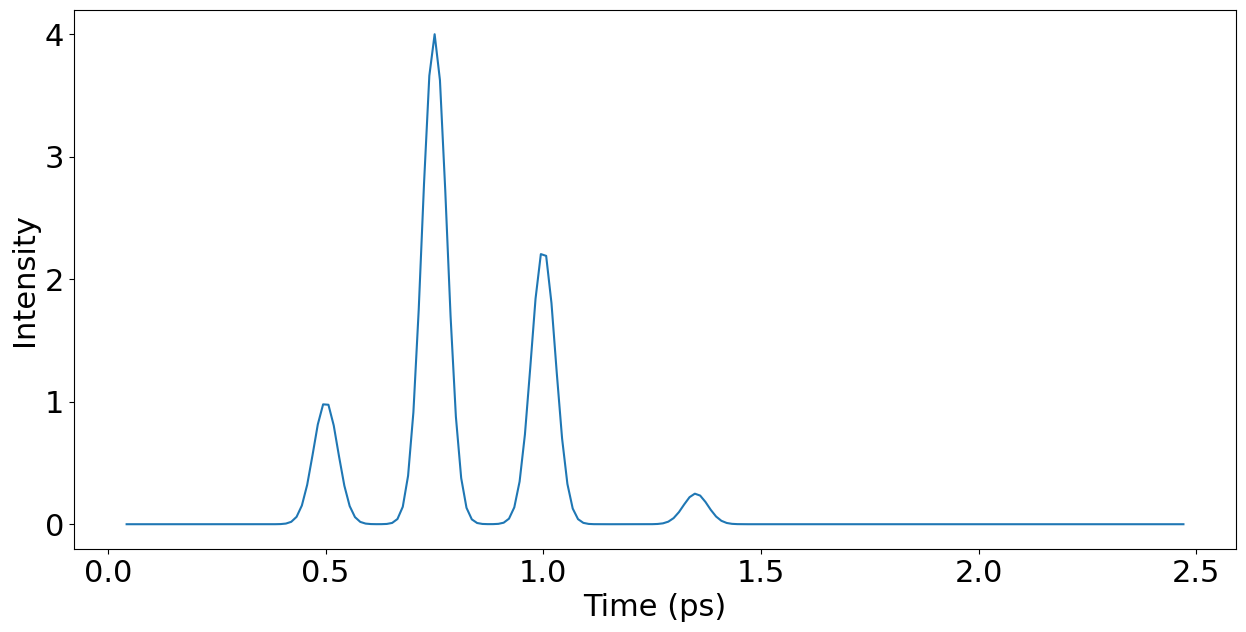

In [21]:
sigma=.1 # pulse width in ps
lam=500 # center wavelength in nm
nu0=3*10**5/lam # center frequency in THz c= 3 10**5 nm/ps
t=np.linspace(-100,100,16394) # time in ps
f=np.exp(-np.pi*(t-.5)**2/sigma**2)+2*np.exp(-np.pi*(t-.75)**2/sigma**2)+1.5*np.exp(-np.pi*(t-1)**2/sigma**2)+.5*np.exp(-np.pi*(t-1.35)**2/sigma**2)
plt.plot(t[8200:8400],np.abs(f[8200:8400])**2)
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')

We capture the power spectral density of this signal interfered with the reference signal
$$r(t)=e^{-\pi \frac{t^2}{\sigma^2}}e^{2\pi i \nu_o t}$$
We assume a delay 5 ps between the signal and the reference.

In [3]:
def r(t,sigma):
    return np.exp(-np.pi*t**2/sigma**2)

Text(0, 0.5, 'Spectral Density')

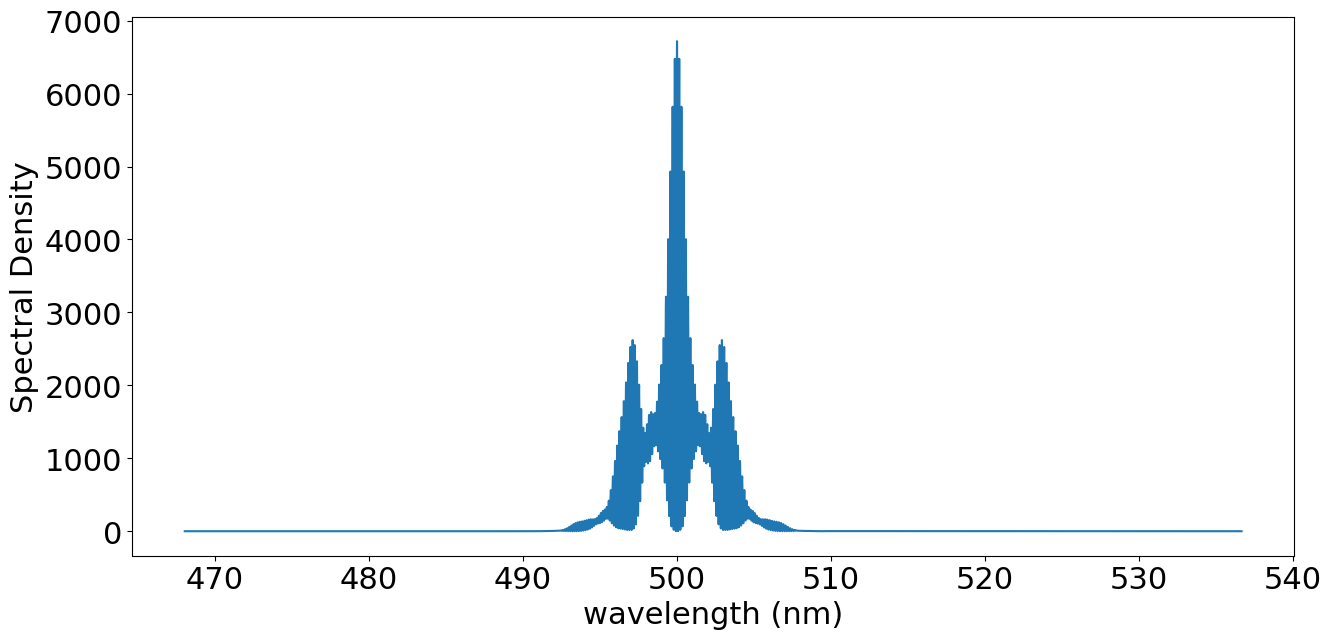

In [22]:

u=np.fft.fftshift(np.fft.fftfreq(len(t),t[1]-t[0]))
lam=3*10**5/(u+nu0)  #lam in nm
S=np.fft.fftshift(np.abs(np.fft.fft(f+5*r(t+5,sigma) )))**2
plt.plot(lam,S)
plt.xlabel('wavelength (nm)')
plt.ylabel('Spectral Density')

As described in the text, the spectrum is
$$
    S(x,\nu )= |{\hat f}(x,\nu )|^2+|{\hat r}({x},\nu )|^2+e^{2\pi i \nu\tau_r}{\hat f}({x},\nu ){\hat r}^\ast({x},\nu )
    +e^{-2\pi i \nu\tau_r}{\hat f}^\ast ({x},\nu ){\hat r}({x},\nu )
$$
The inverse Fourier transform of the power spectrum yields the autocorrelation of the signal and reference at time $t=0$ and the cross correlation of the signal and reference at times $t=\pm \tau_r$

Text(0, 0.5, 'Intensity')

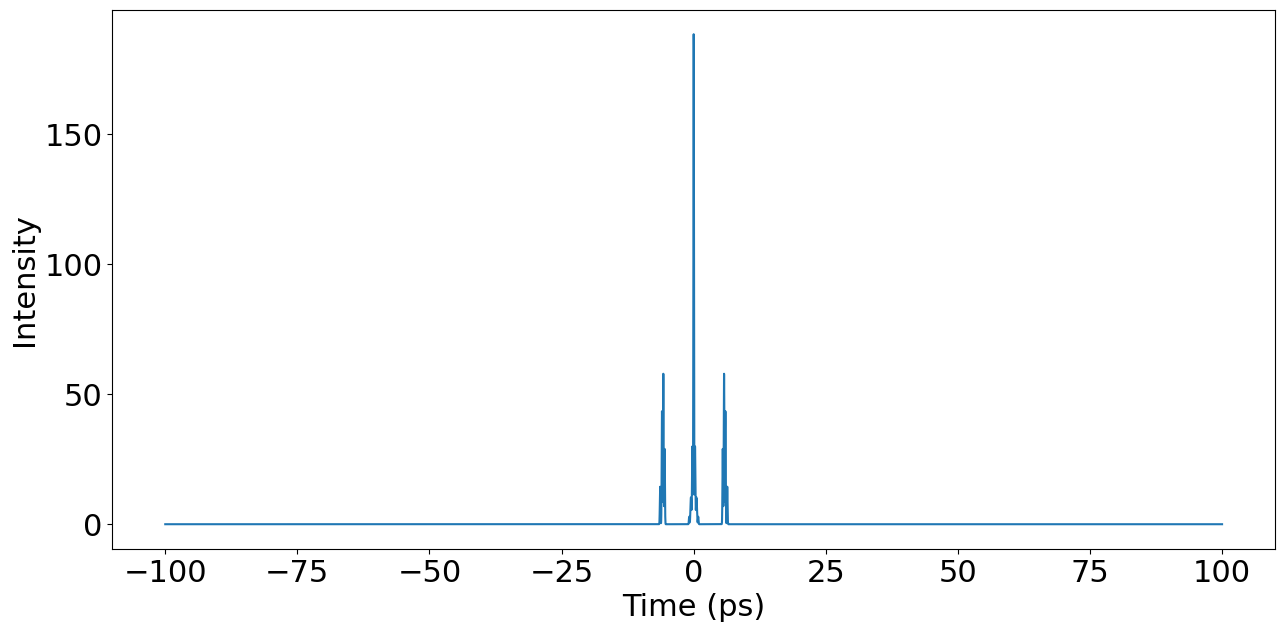

In [23]:
plt.plot(t,np.abs(np.fft.fftshift(np.fft.ifft(S))))
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')

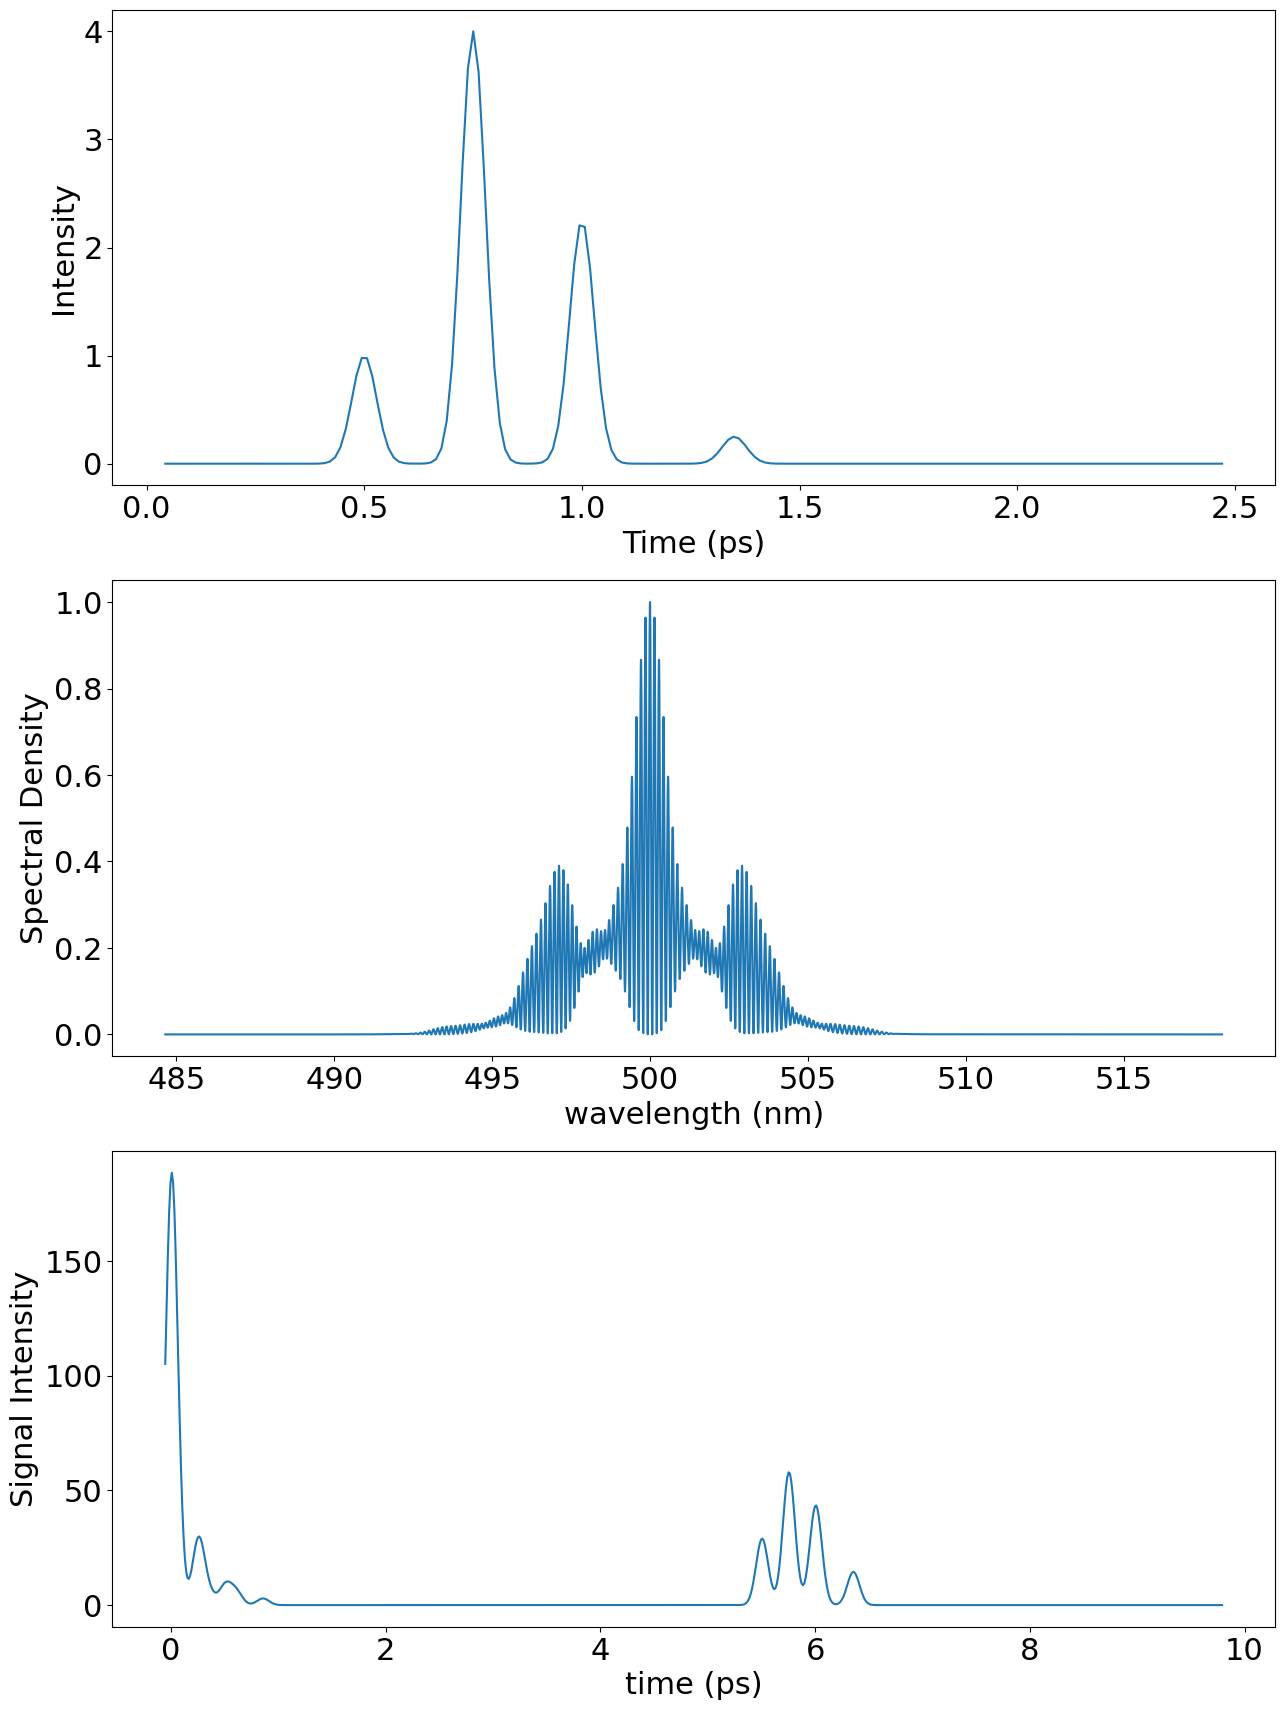

In [24]:
plt.figure(figsize=(15,21))
plt.subplot(3,1,1)
plt.plot(t[8200:8400],np.abs(f[8200:8400])**2)
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')
plt.subplot(3,1,2)
plt.plot(lam[4000:12000],S[4000:12000]/np.max(S[4000:12000]))
plt.xlabel('wavelength (nm)')
plt.ylabel('Spectral Density')
plt.subplot(3,1,3)
plt.plot(t[8192:9000],np.abs(np.fft.fftshift(np.fft.ifft(S)))[8192:9000])
plt.xlabel('time (ps)')
plt.ylabel('Signal Intensity')
plt.savefig('temporalHolography.png')